In [5]:
from src.data.data_loader import read_all
from src.utils.helpers import game_voyage_sorting , plot_sankey_voyage
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import silhouette_score

In [6]:
_, _ , df_categories, _ , _ , df_unfinished, df_finished, _, _ = read_all()

Unfinished Paths
---------------- 
Number of rows before filtering: 24875
Invalid target articles found: {'Charlottes web', 'Georgia', 'Podcast', 'The', 'Pikachu', 'Sportacus', 'Christmas', 'Macedonia', 'Netbook', 'Rat', 'Mustard', 'Long peper', 'Black ops 2', 'Test', 'Adolph Hitler', 'Bogota', 'Western Australia', 'Fats', 'Rss', ' Zebra', 'Usa', 'English', 'Great', 'The Rock', 'Kashmir'}
Invalid articles found in path: {'Wikipedia Text of the GNU Free Documentation License', 'Pikachu'}
Number of 'timeout' games with a duration of less than 30 minutes: 7
Number of rows after filtering: 24714 

Finished Paths
-------------- 
Number of rows before filtering: 51318
Invalid articles found in path: {'Wikipedia Text of the GNU Free Documentation License', 'Pikachu'}
Number of rows after filtering: 51199


## Statistical corelation between paths metrics and voyage status (finished/unfinished) SEPARATELY

In [23]:
from scipy.stats import pearsonr, spearmanr

def calculate_correlations_with_voyage(df, column_name):
    """
    Calculate Pearson and Spearman correlations between 'voyage' and a specified column.
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The column to calculate correlation with 'voyage'.

    Returns:
        None: Prints the correlation results.
    """
    # Ensure 'voyage' is numeric (convert True/False to 1/0)
    df['voyage'] = df['voyage'].astype(int)

    # Calculate Pearson and Spearman correlations
    pearson_corr, pearson_p = pearsonr(df['voyage'], df[column_name])
    spearman_corr, spearman_p = spearmanr(df['voyage'], df[column_name])

    # Print results
    print(f"{column_name}:")
    print(f"  Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4e}")
    print(f"  Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4e}\n")

df_finished = game_voyage_sorting(df_finished, df_categories, True, n=3)
df_unfinished = game_voyage_sorting(df_unfinished, df_categories, True, n=3)

# Fill missing values in 'rating' with the mean
df_finished['rating'] = df_finished['rating'].fillna(df_finished['rating'].mean())

# Convert 'type' column to a binary column 'timeout'
df_unfinished['timeout'] = (df_unfinished['type'] == 'timeout').astype(int)

# Example use-case (replace `df_finished` and `df_unfinished` with actual data)
print("Finished paths:")
for metric in ['durationInSec', 'rating', 'cosine_similarity', 'shortest_path', 'path_length', 'back_clicks', 'categories_similarity']:
    calculate_correlations_with_voyage(df_finished, metric)

print("Unfinished paths:")
for metric in ['durationInSec', 'timeout', 'cosine_similarity', 'shortest_path', 'path_length', 'back_clicks', 'categories_similarity']:
    calculate_correlations_with_voyage(df_unfinished, metric)

Finished paths:
durationInSec:
  Pearson correlation: 0.0499, p-value: 1.2692e-29
  Spearman correlation: 0.1508, p-value: 4.3936e-258

rating:
  Pearson correlation: 0.0829, p-value: 1.0604e-78
  Spearman correlation: 0.0846, p-value: 5.4438e-82

cosine_similarity:
  Pearson correlation: -0.0616, p-value: 3.4246e-44
  Spearman correlation: -0.0436, p-value: 5.3788e-23

shortest_path:
  Pearson correlation: 0.1734, p-value: 0.0000e+00
  Spearman correlation: 0.1707, p-value: 0.0000e+00

path_length:
  Pearson correlation: 0.0932, p-value: 3.9005e-99
  Spearman correlation: 0.1507, p-value: 8.3398e-258

back_clicks:
  Pearson correlation: 0.0265, p-value: 2.0013e-09
  Spearman correlation: 0.0254, p-value: 8.7586e-09

categories_similarity:
  Pearson correlation: -0.0714, p-value: 7.0324e-59
  Spearman correlation: -0.0834, p-value: 1.0836e-79

Unfinished paths:
durationInSec:
  Pearson correlation: 0.0394, p-value: 5.6126e-10
  Spearman correlation: 0.1622, p-value: 3.2339e-145

timeou

## Study with paths merged

In [24]:
paths_merged = pd.concat([df_finished, df_unfinished])
# Sort paths into voyage and non-voyage
paths_merged = game_voyage_sorting(paths_merged, df_categories, True, n=3)
# If the the type is NaN tell that this path is finished
paths_merged['type'] = paths_merged['type'].fillna('Finished')

In [25]:
paths_merged.head(2)

,hashedIpAddress,timestamp,durationInSec,path,rating,cosine_similarity,shortest_path,path_length,back_clicks,categories_similarity,Category Path,start_maincategory,end_maincategory,voyage,cluster,pca1,pca2,target,type,timeout
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th century;15th century;16th century;Pacific...,2.268771,0.353137,3,9,0,1.0,History -> Geography -> History,History,History,True,0,-1.116187,3.724116,NaN,Finished,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th century;Europe;Africa;Atlantic slave trad...,3.000000,0.353137,3,5,0,1.0,History -> Geography -> History,History,History,True,0,-1.709080,3.488130,NaN,Finished,NaN


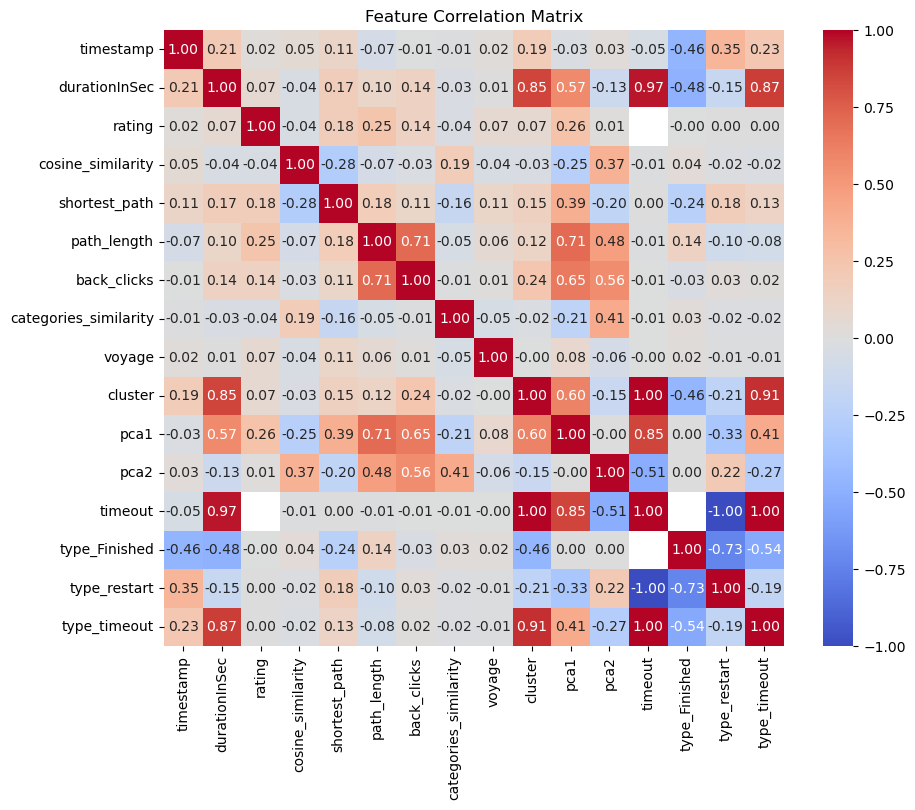

Correlation of features with 'voyage':
 voyage                   1.000000
shortest_path            0.106136
pca1                     0.082366
rating                   0.068304
path_length              0.056594
timestamp                0.021527
type_Finished            0.017857
back_clicks              0.012119
durationInSec            0.007765
cluster                 -0.000369
timeout                 -0.003925
type_timeout            -0.011458
type_restart            -0.011468
cosine_similarity       -0.041375
categories_similarity   -0.050435
pca2                    -0.062976
Name: voyage, dtype: float64


In [26]:
df = paths_merged.copy()

# One-hot encode the 'type' column
df = pd.get_dummies(df, columns=['type'])

# Handle missing values (e.g., replace NaN in 'rating' with the mean)
df['rating'] = df['rating'].fillna(df['rating'].mean())
# Drop columns that are not useful for the analysis
columns_to_drop = ['hashedIpAddress','path','Category Path','start_maincategory','end_maincategory','target']
df = df.drop(columns=columns_to_drop)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Focus on correlation with 'voyage'
voyage_correlation = correlation_matrix['voyage'].sort_values(ascending=False)
print("Correlation of features with 'voyage':\n", voyage_correlation)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Features to cluster paths

Not trivial which features choose to cluster the paths to see if their correlate to being a voyage or not...

We migth clusters multiples groups of features or do it separatly (What to try??)

Features interesting 
- For df_finished: 
```features = ['durationInSec','rating','cosine_similarity','shortest_path','path_length', 'back_clicks', 'categories_similarity']```
- For df_unfinsihed:
Same but + ```type``` and without ```rating```

Maybe also merged all paths... -> the **silhouette_score** for 2 cluster change if paths are merged or not (logic both type paths differ in logic and length)
- df_finished : 0.6
- df_unfinished : 0.2 (better at 4 cluster (0.35)) **without type column**
- df_unfinished : 0.4 (better at 4 cluster (0.45)) **with type column**
- df_finished + df_unfinished : 0.4 **without type column** (one options is to create 3 dummies: finish,  timeout, restart)

=> mmm beter do it separatly to avoid the confounding of cluster by intrisic differences btw f and u

**IDEA**
Cluster paths based on subsets of features that represent specific aspects of behavior or data:

- Group A: Path Characteristics
Features: ``durationInSec, path_length, back_clicks.``  
Focus: Captures navigation dynamics (e.g., efficiency, hesitation).

- Group B: Content Similarity
Features: ``cosine_similarity, categories_similarity.``   
Focus: Captures how similar the target and the source of the path are similar.

- Group C: Performance Metrics
Features: ``rating, shortest_path.``  
Focus: Measures subjective and objective path quality.

For the moment done with all meaningfull and not bias (towards voyage) features


## K-means

In [28]:
def silhouette_score_plot(df_scaled, max_clusters):
    scores = []
    for k in tqdm(range(2, max_clusters), desc="Calculating silhouette scores"):
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
        labels = kmeans.fit_predict(df_scaled)
        scores.append(silhouette_score(df_scaled, labels))

    plt.plot(range(2, max_clusters), scores, marker='o')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

## df_finished

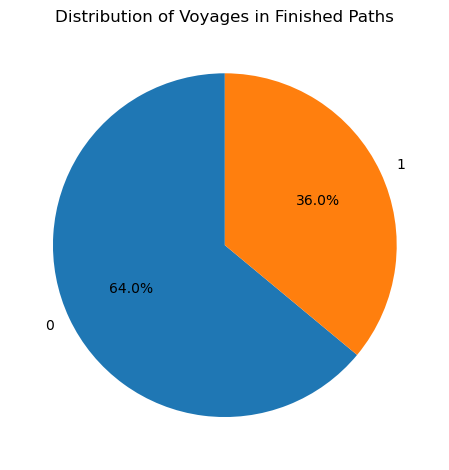

In [29]:
# Calculate the distribution of voyages
voyage_counts = df_finished['voyage'].value_counts()
plt.figure()
plt.pie(
    voyage_counts,
    labels=voyage_counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('Distribution of Voyages in Finished Paths')
plt.tight_layout()
plt.show()

In [30]:
features = ['durationInSec','cosine_similarity','shortest_path','path_length', 'back_clicks', 'categories_similarity'] # 'rating'
# rating we could use the mean value or do clusters with only paths with ratting?

# Normalize the features for clustering
scaler = StandardScaler()
df_scaled_f = scaler.fit_transform(df_finished[features])

Calculating silhouette scores: 100%|██████████| 4/4 [03:03<00:00, 45.91s/it]


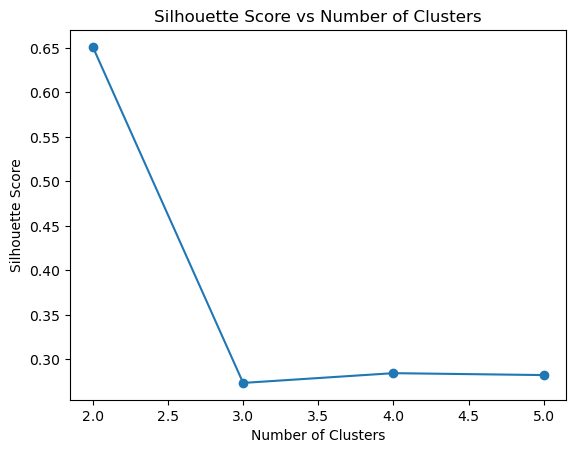

In [14]:
silhouette_score_plot(df_scaled_f, 6)

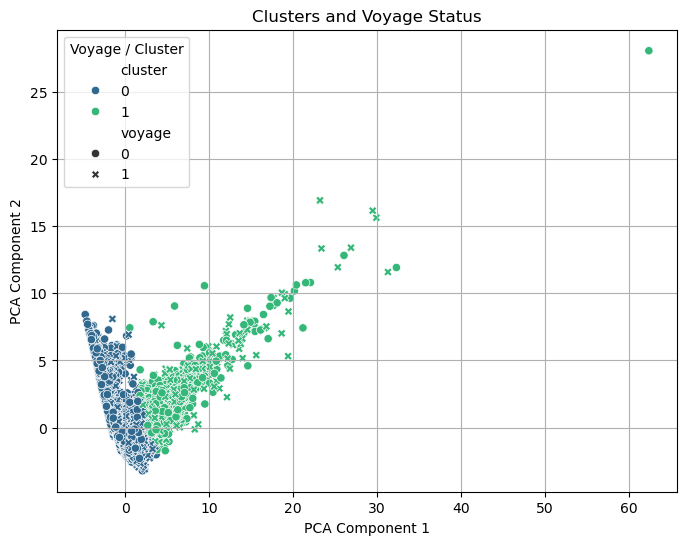

In [31]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
df_finished['cluster'] = kmeans.fit_predict(df_scaled_f)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled_f)
df_finished['pca1'], df_finished['pca2'] = reduced_data[:, 0], reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='viridis', data=df_finished,style='voyage')
plt.title('Clusters and Voyage Status')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Voyage / Cluster')
plt.grid(True)
plt.show()

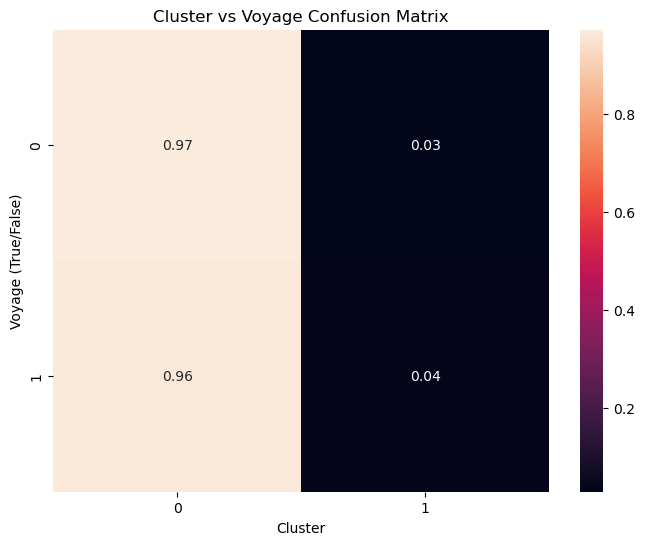

Percentage size of each cluster:
Cluster 0: 96.72%
Cluster 1: 3.28%


In [32]:
# Generate a confusion matrix-like DataFrame
confusion_matrix = (
    df_finished.groupby('voyage')['cluster']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cbar=True)
plt.title("Cluster vs Voyage Confusion Matrix")
plt.ylabel("Voyage (True/False)")
plt.xlabel("Cluster")
plt.show()

# Calculate the percentage size of each cluster
cluster_percentages = df_finished['cluster'].value_counts(normalize=True) * 100

# Print the results
print("Percentage size of each cluster:")
for cluster, percentage in cluster_percentages.items():
    print(f"Cluster {cluster}: {percentage:.2f}%")

## df_unfinished

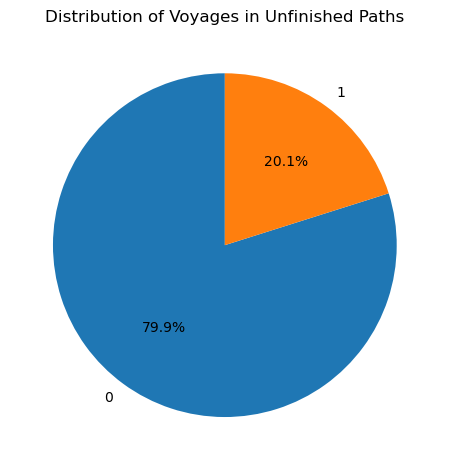

In [33]:
# Calculate the distribution of voyages
voyage_counts = df_unfinished['voyage'].value_counts()
plt.figure()
plt.pie(
    voyage_counts,
    labels=voyage_counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('Distribution of Voyages in Unfinished Paths')
plt.tight_layout()
plt.show()

In [37]:
features = ['durationInSec','cosine_similarity','shortest_path','path_length', 'back_clicks', 'categories_similarity']
# timout is a binary variable: 0 is for restart and 1 is for timeout

# Normalize the features for clustering
scaler = StandardScaler()
df_scaled_u = scaler.fit_transform(df_unfinished[features])

Calculating silhouette scores: 100%|██████████| 4/4 [00:42<00:00, 10.70s/it]


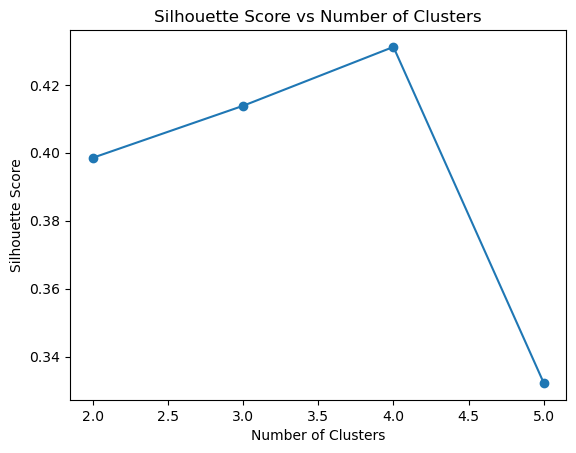

In [19]:
silhouette_score_plot(df_scaled_u, 6)

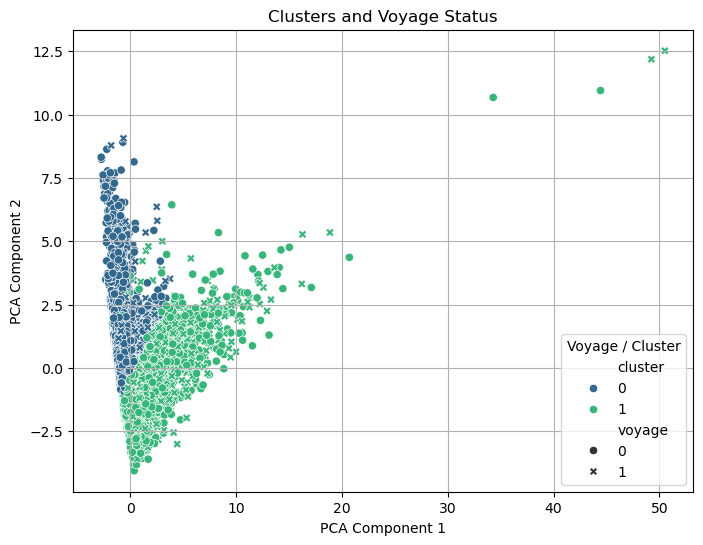

In [38]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
df_unfinished['cluster'] = kmeans.fit_predict(df_scaled_u)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled_u)
df_unfinished['pca1'], df_unfinished['pca2'] = reduced_data[:, 0], reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='viridis', data=df_unfinished,style='voyage')
plt.title('Clusters and Voyage Status')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Voyage / Cluster')
plt.grid(True)
plt.show()

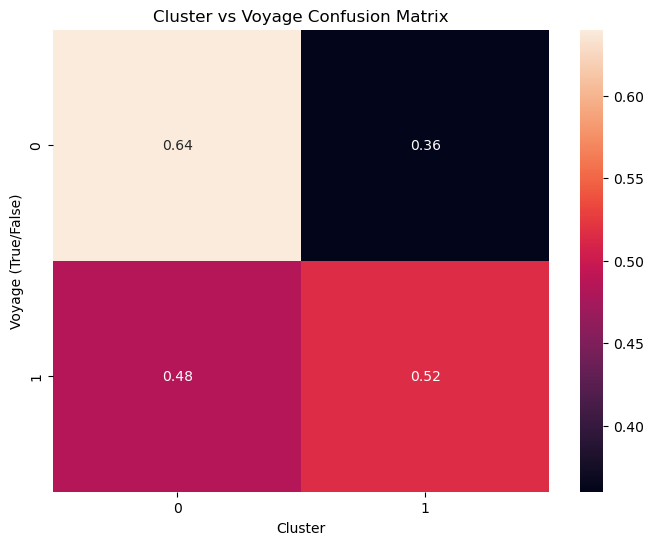

Percentage size of each cluster:
Cluster 0: 60.86%
Cluster 1: 39.14%


In [39]:
# Generate a confusion matrix-like DataFrame
confusion_matrix = (
    df_unfinished.groupby('voyage')['cluster']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cbar=True)
plt.title("Cluster vs Voyage Confusion Matrix")
plt.ylabel("Voyage (True/False)")
plt.xlabel("Cluster")
plt.show()

# Calculate the percentage size of each cluster
cluster_percentages = df_unfinished['cluster'].value_counts(normalize=True) * 100

# Print the results
print("Percentage size of each cluster:")
for cluster, percentage in cluster_percentages.items():
    print(f"Cluster {cluster}: {percentage:.2f}%")


# Hierarchical Clustering 
$O(n^{2})$ memory complexity ! for paths...

In [22]:
"""from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering
# Method: 'ward' minimizes variance; try 'single', 'complete', 'average' for other linkage criteria
linkage_matrix = linkage(df_scaled, method='ward')


# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Assign cluster labels based on a distance threshold or number of clusters
# Example: Cutting the dendrogram to form 3 clusters
cluster_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Add cluster labels to your dataset (if applicable)
# df['cluster'] = cluster_labels  # Uncomment and replace df with your DataFrame

# Print example cluster assignments
print("Cluster labels:", cluster_labels)"""

'from scipy.cluster.hierarchy import linkage, dendrogram, fcluster\nimport matplotlib.pyplot as plt\n\n# Perform hierarchical clustering\n# Method: \'ward\' minimizes variance; try \'single\', \'complete\', \'average\' for other linkage criteria\nlinkage_matrix = linkage(df_scaled, method=\'ward\')\n\n\n# Plot the dendrogram\nplt.figure(figsize=(12, 8))\ndendrogram(linkage_matrix, truncate_mode=\'level\', p=5, leaf_rotation=90., leaf_font_size=10.)\nplt.title(\'Hierarchical Clustering Dendrogram\')\nplt.xlabel(\'Sample Index\')\nplt.ylabel(\'Distance\')\nplt.grid(True)\nplt.show()\n\n# Assign cluster labels based on a distance threshold or number of clusters\n# Example: Cutting the dendrogram to form 3 clusters\ncluster_labels = fcluster(linkage_matrix, t=3, criterion=\'maxclust\')\n\n# Add cluster labels to your dataset (if applicable)\n# df[\'cluster\'] = cluster_labels  # Uncomment and replace df with your DataFrame\n\n# Print example cluster assignments\nprint("Cluster labels:", cl